# Plotting teams exploration of tradespace over the theoretical traedspace

First making sure that I can read the tradespace enumeration files generated from MATLAB.


In [12]:
import os.path
from scipy.io import loadmat

ANALYTICAL_TRADESPAVCE_FILE = os.path.expanduser("~/Learning2019Data/AnalyticalTradespace/tradespaceData.mat")
x = loadmat(ANALYTICAL_TRADESPAVCE_FILE)

timeCampus       = list()
totalCost        = list()
interactionScore = list()
diversityScore   = list()

for data_row in x['MasieResults']:
    for i in range(len(data_row)):
        timeCampus.append       (data_row[i][0][0][ 9][0][0])
        totalCost.append        (data_row[i][0][0][10][0][0])
        interactionScore.append (data_row[i][0][0][11][0][0])
        diversityScore.append   (data_row[i][0][0][12][0][0])


Now plotting the theoretical tradespace data only to check for consistency with MATLAB plots

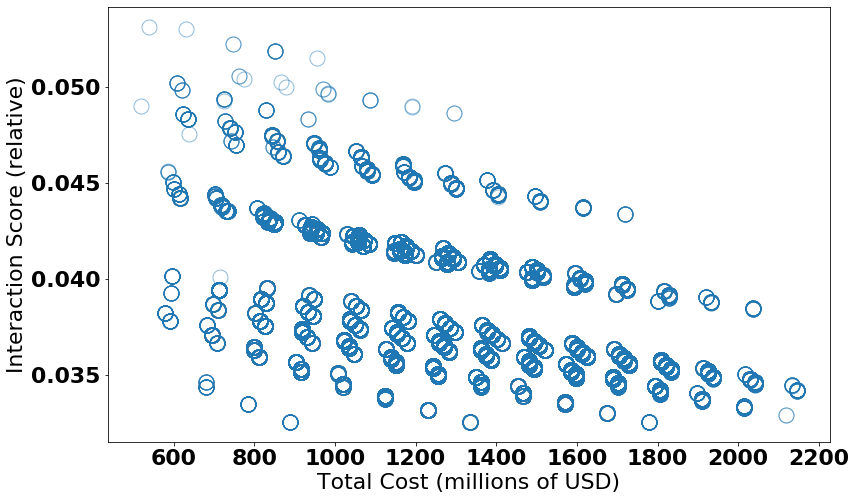

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

GOLDEN_RATIO = np.array([1.61803398875, 1])
plt.figure(figsize=GOLDEN_RATIO*8)

plt.plot(totalCost, interactionScore, marker="o", linewidth=0, markersize=15, fillstyle='none', alpha=0.5)
plt.xlabel ('Total Cost (millions of USD)')
plt.ylabel ('Interaction Score (relative)')
plt.show()

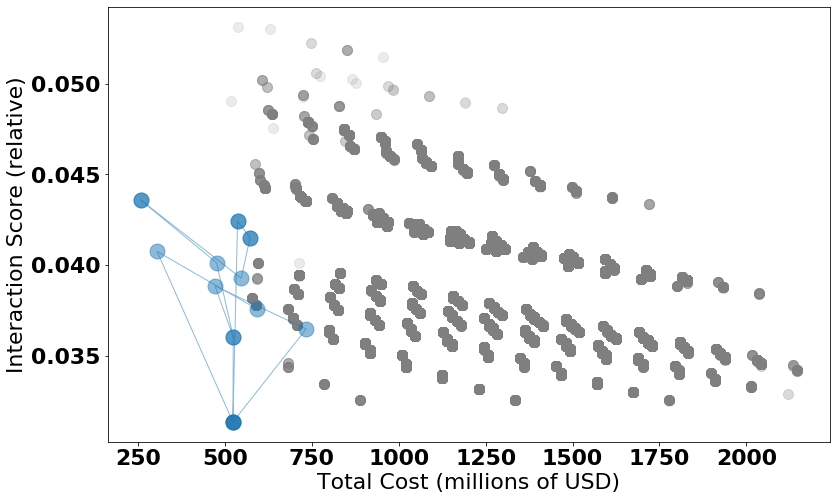

In [21]:
import sys
sys.path.append("../CommonModules") # go to parent dir/CommonModules

import Learning2019GTL.Globals as Globals
import Learning2019GTL.DataConnector as DataConnector

team = DataConnector.Team()
ui_events = team.getSimulationUIEventsByTeamID(23)

team_cost        = list()
team_interaction = list()
for event in ui_events:
    team_cost.append(event.total_cost)
    team_interaction.append(event.interaction_score)

team_cost        = np.array(team_cost)
team_interaction = np.array(team_interaction)
    
plt.figure(figsize=GOLDEN_RATIO*8)

plt.plot(totalCost, interactionScore, marker="o", linewidth=0, markersize=10, alpha=0.15, color='#7f7f7f')
plt.plot(team_cost, team_interaction/100.0, marker="o", linewidth=1, markersize=15, alpha=0.5)
plt.xlabel ('Total Cost (millions of USD)')
plt.ylabel ('Interaction Score (relative)')
plt.show()

In [ ]:
import sys
sys.path.append("../CommonModules") # go to parent dir/CommonModules

import Learning2019GTL.Globals as Globals
import Learning2019GTL.DataConnector as DataConnector

teams_to_plot = [23, 21]

    
plt.figure(figsize=GOLDEN_RATIO*8)
plt.plot(totalCost, interactionScore, marker="o", linewidth=0, markersize=10, alpha=0.15, color='#7f7f7f')

for t_plot in teams_to_plot:
    team = DataConnector.Team()
    ui_events = team.getSimulationUIEventsByTeamID(t_plot)

    team_cost        = list()
    team_interaction = list()
    for event in ui_events:
        team_cost.append(event.total_cost)
        team_interaction.append(event.interaction_score)

    team_cost        = np.array(team_cost)
    team_interaction = np.array(team_interaction)

    plt.plot(team_cost, team_interaction/100.0, marker="o", linewidth=1, 
             markersize=15, alpha=0.5, label=f'Team {t_plot}')
    
plt.xlabel ('Total Cost (millions of USD)')
plt.ylabel ('Interaction Score (relative)')
plt.show()